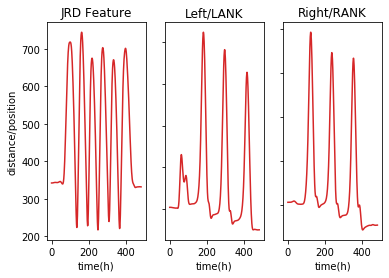

In [1]:
from pyomeca import Markers
import math
import matplotlib.pyplot as plt

data_path = "data/data.c3d"

def jrd_method(m1,m2):
    channels = [m1, m2]
    markers = Markers.from_c3d(data_path, usecols=channels)

    arr_distance_jrd = []
    arr_left = []
    arr_right = []
    time = []
    i = 0
    x_2 = 0
    y_2 = 0
    z_2 = 0

    while i < 485:
    
        x_2 = (markers[0][0][i] - markers[0][1][i]) ** 2
        y_2 = (markers[1][0][i] - markers[1][1][i]) ** 2
        z_2 = (markers[2][0][i] - markers[2][1][i]) ** 2
        time.append(i)
    
        arr_left.append(markers[2][0][i])
        arr_right.append(markers[2][1][i])
        arr_distance_jrd.append(math.sqrt(x_2+y_2+z_2))
    
        i += 1
    
    fig, axs = plt.subplots(1, 3)
    axs[0].plot(time, arr_distance_jrd, 'tab:red')
    axs[0].set_title('JRD Feature') 
    axs[1].plot(time, arr_left, 'tab:red')
    axs[1].set_title('Left/' + m1)
    axs[2].plot(time, arr_right, 'tab:red')
    axs[2].set_title('Right/' + m2)
    
    for ax in axs.flat:
        ax.set(xlabel='time(h)', ylabel='distance/position')
        
    for ax in axs.flat:
        ax.label_outer()

jrd_method('LANK', 'RANK')
